In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
fn = 'dump.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))


In [3]:
# unnecessary/ unknown features
points = points.drop(columns=['banned','ip'])

# fokus on basic features
points = points[['lat', 'lon', 'wait']]
points = points.dropna()

In [4]:
waiting_time_per_point = points.groupby(["lat", "lon"]).mean()

In [5]:
# splitting 60-20-20
train, test = train_test_split(waiting_time_per_point, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)

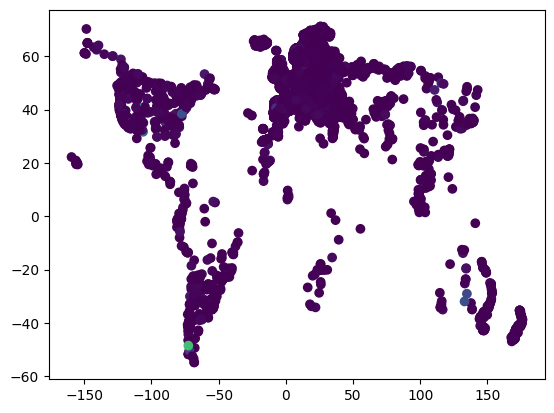

In [109]:
plt.scatter(train.index.get_level_values('lon'), train.index.get_level_values('lat'), c=train['wait'], cmap='viridis')

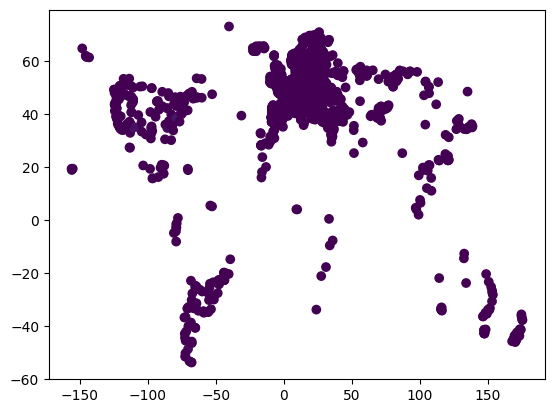

In [110]:
plt.scatter(val.index.get_level_values('lon'), val.index.get_level_values('lat'), c=val['wait'], cmap='viridis')

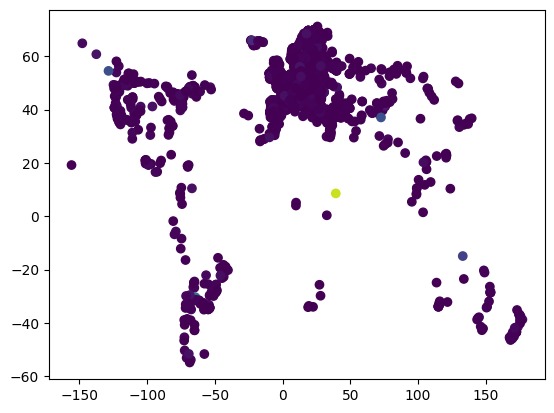

In [111]:
plt.scatter(test.index.get_level_values('lon'), test.index.get_level_values('lat'), c=test['wait'], cmap='viridis')

In [112]:
waiting_time_per_point.to_csv("data/points.csv", index=True)

train.to_csv("data/points_train.csv", index=True)
train.to_csv("data/train.csv", index=True)
val.to_csv("data/points_val.csv", index=True)
test.to_csv("data/points_test.csv", index=True)

In [113]:
len(train), len(val), len(test)

(9885, 3295, 3296)

In [114]:
# kaggle
val['Usage'] = 'Public'
test['Usage'] = 'Private'
kaggle_test = pd.concat([val, test])
kaggle_test.to_csv("data/test.csv", index=True)

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [115]:
train['id'] = train.index
test['id'] = test.index

train = train[['id', 'lat', 'lon', 'wait']]
solution = test[['id', 'wait', 'Usage']]
test = test[['id', 'lat', 'lon']]

In [116]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)
solution.to_csv("data/solution.csv", index=False)

In [118]:
train[['id', 'wait']].to_csv("data/sample_submission.csv", index=False)